In [1]:
# Import the required packages
# Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package seaborn for drawing  statistical graphics
import seaborn as sns

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

import matplotlib.patches as mpatches

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Reading from a csv file, into a data frame
df = pd.read_csv('covid19-cdc-20201672.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [3]:
# Check how many rows and columns this dataframe has
df.shape

(10000, 12)

The dataset has 10000 entries with 12 features per entry

### Print first and last 5 rows of CSV file

In [4]:
# Show first 5 rows of data frame
# The rows are indexed starting from 0
df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/02,2020/11/05,NaN,2020/11/02,Probable Case,Male,Missing,"White, Non-Hispanic",No,Missing,No,Missing
1,2020/12/01,NaN,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing
2,2020/10/29,2020/10/29,NaN,2020/10/29,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing
3,2020/04/30,2020/05/13,2020/04/30,2020/04/30,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,No,No,No,Unknown
4,2020/04/16,2020/04/26,2020/04/17,2020/04/16,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Yes,Yes,Yes


In [5]:
# Show last 5 rows of data frame
# NaN means that the feature value is missing
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020/12/11,NaN,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Unknown,Missing,No,Missing
9996,2020/10/26,2020/10/26,NaN,NaN,Laboratory-confirmed case,Male,60 - 69 Years,Hispanic/Latino,Unknown,Unknown,No,Missing
9997,2020/07/24,2020/08/29,NaN,2020/07/24,Laboratory-confirmed case,Female,50 - 59 Years,Hispanic/Latino,No,Missing,No,Yes
9998,2020/06/26,2020/06/27,NaN,2020/06/27,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,No,Missing,No,Missing
9999,2020/07/02,2020/07/22,NaN,2020/07/02,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing


### Convert features to appropriate datatypes

In [6]:
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

In [7]:
# select all the remaining object features to convert them into categorical
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt',
       'current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'],
      dtype='object')

In [8]:
# Convert data type to datetime for these columns
# The data is mentioned in dates hence the most appropriate datatype could be datetime 
# initially set date columns to datetime datatype. 
df['cdc_case_earliest_dt'] = pd.to_datetime(df['cdc_case_earliest_dt'],errors = 'ignore')
df['cdc_report_dt'] = pd.to_datetime(df['cdc_report_dt'],errors = 'ignore')
df['pos_spec_dt'] = pd.to_datetime(df['pos_spec_dt'],errors = 'ignore')
df['onset_dt'] = pd.to_datetime(df['onset_dt'],errors = 'ignore')

    
df.dtypes  

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                     object
sex                                object
age_group                          object
race_ethnicity_combined            object
hosp_yn                            object
icu_yn                             object
death_yn                           object
medcond_yn                         object
dtype: object

In [9]:
# Select columns containing categorical data
categorical_columns = df[['current_status','sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','death_yn','medcond_yn']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  
    
df.dtypes    

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

In [10]:
#store all the categorical features into a variable for future use
category_columns = df.select_dtypes(['category']).columns

Based on examining the data in COVID-19 Case Surveillance Public Use Data, 8 of the features are categorical and the rest are datetime.

- *current_status* will be converted to **categorical** because it contains only 2 possible values, Laboratory-confirmed case and  Probable Case.
- *sex* column will be converted to **categorical** because it contains gender such as Male,Female,other and unknown values.
- *age_group* column will be converted to categorical because it contains a finite set of possible values, example: 20-29, each representing a range of patient's age.
- *race_ethnicity_combined* will be converted to **categorical** because it contains type of race patient belongs to such as ethnicity wise discrimination.
- *hosp_yn*,*icu_yn*,*death_yn*,*medcond_yn* will be converted to **categorical** because it contains yes/no/unknown and missing type of fields.


In [11]:
date_max = {"cdc_case_earliest_max_date" : df.cdc_case_earliest_dt.max(), "cdc_report_max_date" : df.cdc_report_dt.max(), "pos_spec_max_date" : df.pos_spec_dt.max(), "onset_max_date" : df.onset_dt.max()}

In [12]:
date_min = {"cdc_case_earliest_min_date" : df.cdc_case_earliest_dt.min(), "cdc_report_min_date" : df.cdc_report_dt.min(), "pos_spec_min_date" : df.pos_spec_dt.min(), "onset_min_date" : df.onset_dt.min()}

In [13]:
days_column = []
for key,values in date_min.items():
    days_column.append(key[:-8]+'days')
    temp_variable = df[key[:-8]+'dt'] - values
    temp_variable = temp_variable/np.timedelta64(1,'D').astype(int) #to convert the result into integer
    temp_variable = temp_variable.dt.days
    df[key[:-8]+'days'] = temp_variable


In [14]:
df.head(10)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_days,cdc_report_days,pos_spec_days,onset_days
0,2020-11-02,2020-11-05,NaT,2020-11-02,Probable Case,Male,Missing,"White, Non-Hispanic",No,Missing,No,Missing,304,292.0,NaN,304.0
1,2020-12-01,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing,333,NaN,NaN,NaN
2,2020-10-29,2020-10-29,NaT,2020-10-29,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing,300,285.0,NaN,300.0
3,2020-04-30,2020-05-13,2020-04-30,2020-04-30,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,No,No,No,Unknown,118,116.0,47.0,118.0
4,2020-04-16,2020-04-26,2020-04-17,2020-04-16,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Yes,Yes,Yes,104,99.0,34.0,104.0
5,2020-11-03,2020-11-03,NaT,2020-11-03,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing,305,290.0,NaN,305.0
6,2020-12-22,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,354,NaN,NaN,NaN
7,2020-11-30,2020-11-30,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"American Indian/Alaska Native, Non-Hispanic",Unknown,Missing,No,Missing,332,317.0,NaN,NaN
8,2020-11-13,2020-11-19,2020-11-13,NaT,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,315,306.0,244.0,NaN
9,2020-11-03,2020-11-12,NaT,2020-11-03,Probable Case,Female,50 - 59 Years,"White, Non-Hispanic",No,Missing,No,Missing,305,299.0,NaN,305.0


In [15]:
df_test=df

In [16]:
df[['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'cdc_case_earliest_days', 'cdc_report_days', 'pos_spec_days', 'onset_days']].head(1)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,cdc_case_earliest_days,cdc_report_days,pos_spec_days,onset_days
0,2020-11-02,2020-11-05,NaT,2020-11-02,304,292.0,NaN,304.0


In [17]:
print('\nThe minimum date value of cdc_case_earliest_dt is :',df.cdc_case_earliest_dt.min())
print('The difference b/w these 2 dates is : ')
print(df[['cdc_case_earliest_dt']].head(1) - df.cdc_case_earliest_dt.min())

print('\nThe minimum date value of cdc_report_dt is :',df.cdc_report_dt.min())
print('The difference b/w these 2 dates is : ')
print(df[['cdc_report_dt']].head(1) - df.cdc_report_dt.min())


print('\nThe minimum date value of onset_dt is :',df.onset_dt.min())
print('The difference b/w these 2 dates is : ')
print(df[['onset_dt']].head(1) - df.onset_dt.min())


The minimum date value of cdc_case_earliest_dt is : 2020-01-03 00:00:00
The difference b/w these 2 dates is : 
  cdc_case_earliest_dt
0             304 days

The minimum date value of cdc_report_dt is : 2020-01-18 00:00:00
The difference b/w these 2 dates is : 
  cdc_report_dt
0      292 days

The minimum date value of onset_dt is : 2020-01-03 00:00:00
The difference b/w these 2 dates is : 
  onset_dt
0 304 days


In [18]:
column_names = list(df.columns)
column_names

['cdc_case_earliest_dt',
 'cdc_report_dt',
 'pos_spec_dt',
 'onset_dt',
 'current_status',
 'sex',
 'age_group',
 'race_ethnicity_combined',
 'hosp_yn',
 'icu_yn',
 'death_yn',
 'medcond_yn',
 'cdc_case_earliest_days',
 'cdc_report_days',
 'pos_spec_days',
 'onset_days']

In [19]:
#swap the first 4 features with the newly calculated days features
for i in range(0,4):
    column_names[i], column_names[i+12] = column_names[i+12], column_names[i]

column_names
df = df[column_names]

In [20]:
# #drop the initial date features from the data frame.
# try:
#     for key, values in date_min.items():
#         df = df.drop([key[:-8]+'dt'], axis=1)
# except:
#     print("Column not available in the dataframe")

In [21]:
df.head(5)

,cdc_case_earliest_days,cdc_report_days,pos_spec_days,onset_days,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt
0,304,292.0,NaN,304.0,Probable Case,Male,Missing,"White, Non-Hispanic",No,Missing,No,Missing,2020-11-02,2020-11-05,NaT,2020-11-02
1,333,NaN,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing,2020-12-01,NaT,NaT,NaT
2,300,285.0,NaN,300.0,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing,2020-10-29,2020-10-29,NaT,2020-10-29
3,118,116.0,47.0,118.0,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,No,No,No,Unknown,2020-04-30,2020-05-13,2020-04-30,2020-04-30
4,104,99.0,34.0,104.0,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Yes,Yes,Yes,2020-04-16,2020-04-26,2020-04-17,2020-04-16


### Check for duplicate row/columns

In [22]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  455
Number of duplicate rows (including first) in the table is: 821


In [23]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


Result - Duplicate rows exist
- Rows - As there are four date fields designated for patients covid tracking report and 1 column is derived from 2 adjacent columns the 'cdc_case_earliest_dt' acts like the primary key column in the dataset. There is no primary key in the dataset to check if a user is included twice. Therefore comparison with other column is required. This initially returned 1794 duplicate rows. To also include the rows that were matched I include "keep=False" parameter. Displaying these rows in a dataframe I see they include missing as well as unknown values for few attributes.
- Columns - There are 3 duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.

Duplicate rows can be seen below

In [24]:
# Show duplicate row data that can be dropped
df[df.duplicated(keep=False)]

,cdc_case_earliest_days,cdc_report_days,pos_spec_days,onset_days,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt
19,346,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing,2020-12-14,NaT,NaT,NaT
27,373,NaN,NaN,NaN,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing,2021-01-10,NaT,NaT,NaT
41,343,NaN,NaN,NaN,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Unknown,Missing,No,Missing,2020-12-11,NaT,NaT,NaT
82,342,327.0,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,2020-12-10,2020-12-10,NaT,NaT
96,348,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing,2020-12-16,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,369,NaN,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Unknown,Missing,No,Missing,2021-01-06,NaT,NaT,NaT
9916,339,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing,2020-12-07,NaT,NaT,NaT
9932,362,NaN,NaN,NaN,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing,2020-12-30,NaT,NaT,NaT
9978,200,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing,2020-07-21,NaT,NaT,NaT


In [25]:
# Check for duplicate rows and columns in this toy df that atually has duplicated rows and columns, 
#to check the duplicate checks work correctly
cdc_duplicates_df = df[df.duplicated(keep=False)].iloc[:,0:7].head()
cdc_duplicates_df

,cdc_case_earliest_days,cdc_report_days,pos_spec_days,onset_days,current_status,sex,age_group
19,346,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years
27,373,NaN,NaN,NaN,Laboratory-confirmed case,Female,20 - 29 Years
41,343,NaN,NaN,NaN,Laboratory-confirmed case,Male,50 - 59 Years
82,342,327.0,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years
96,348,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years


In [26]:
print('Number of duplicate (excluding first) rows in the cdc table is: ', cdc_duplicates_df.duplicated().sum())
print('Number of duplicate rows (including first) in the cdc table is:', cdc_duplicates_df[cdc_duplicates_df.duplicated(keep=False)].shape[0])

#transpose the cdc df
cdc_duplicates_dfT = cdc_duplicates_df.T
print("\nNumber of duplicate (excluding first) columns in the cdc table is: ", cdc_duplicates_dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the cdc table is: ",  cdc_duplicates_dfT[cdc_duplicates_dfT.duplicated(keep=False)].shape[0])



Number of duplicate (excluding first) rows in the cdc table is:  0
Number of duplicate rows (including first) in the cdc table is: 0

Number of duplicate (excluding first) columns in the cdc table is:  1
Number of duplicate (including first) columns in the cdc table is:  2


#### The duplicate checks seems to be working as expected.

Duplicate columns will be droped from the data frame. None of the rows are dropped from the data set.
- The columns below are dropped because the 'cdc_case_earliest_dt' column is a derived column. It is computed by taking the maximum date from 'pos_spec_dt' and 'onset_dt' date column.
- 'cdc_report_dt' date column as mentioned in the description of data set is a Depreciated column. Thus not of any use for analysis purpose.

In [27]:
df = df.drop_duplicates(keep='last')
# get duplicated row data. Use "keep=False" to mark all duplicates as true
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


In [28]:
# min date  of cdc_case_earliest_dt is 2020-02-15 and min date of onset_dt is 2020-02-12
# As I converted these features into no of days there is diff b/w these values i.e. 3 = 2020-02-15 - 2020-02-12
# So to prove that these 2 features are same, for the comparision 3 is added with every cell in cdc_case_earliest_days

earliest_days = df[['cdc_case_earliest_days']]+3  #as the difference b/w the min dates of these features is 3 days
onset_duplicates = pd.concat([earliest_days, df[['onset_days']]], axis=1)

#drop all the missing values in onset_days feature 
onset_duplicates = onset_duplicates.dropna(subset=['onset_days'])


In [29]:
# get all values which are not equal b/w 2 features
onset_duplicates[onset_duplicates['cdc_case_earliest_days'] != onset_duplicates['onset_days']]

,cdc_case_earliest_days,onset_days
0,307,304.0
2,303,300.0
3,121,118.0
4,107,104.0
5,308,305.0
...,...,...
9990,204,201.0
9991,339,336.0
9997,206,203.0
9998,178,176.0


In [30]:
df = df.drop(['onset_days'], axis=1)

In [31]:
df.head(5)

,cdc_case_earliest_days,cdc_report_days,pos_spec_days,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt
0,304,292.0,NaN,Probable Case,Male,Missing,"White, Non-Hispanic",No,Missing,No,Missing,2020-11-02,2020-11-05,NaT,2020-11-02
1,333,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing,2020-12-01,NaT,NaT,NaT
2,300,285.0,NaN,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing,2020-10-29,2020-10-29,NaT,2020-10-29
3,118,116.0,47.0,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,No,No,No,Unknown,2020-04-30,2020-05-13,2020-04-30,2020-04-30
4,104,99.0,34.0,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Yes,Yes,Yes,2020-04-16,2020-04-26,2020-04-17,2020-04-16


In [32]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns

In [33]:
df.to_csv("Cleaned_data_report.csv",index=False)

### Check for constant columns

#### Continous features

In [34]:
df[numeric_columns].head()

,cdc_case_earliest_days,cdc_report_days,pos_spec_days
0,304,292.0,NaN
1,333,NaN,NaN
2,300,285.0,NaN
3,118,116.0,47.0
4,104,99.0,34.0


In [35]:
df_table_numeric = df[numeric_columns].describe().T
df_table_numeric

,count,mean,std,min,25%,50%,75%,max
cdc_case_earliest_days,9545.0,273.306862,86.215245,0.0,201.00,306.0,344.0,379.0
cdc_report_days,7591.0,272.670399,81.096151,0.0,210.00,299.0,338.0,377.0
pos_spec_days,2790.0,186.730466,89.296143,0.0,115.25,213.0,263.0,317.0


In [36]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9545,2,Laboratory-confirmed case,8912
sex,9545,5,Female,4974
age_group,9545,10,20 - 29 Years,1762
race_ethnicity_combined,9545,9,Unknown,3604
hosp_yn,9545,5,No,5133
icu_yn,9545,4,Missing,7194
death_yn,9545,2,No,9211
medcond_yn,9545,4,Missing,7015


**Continuous Data** - Reviewing the continuous data, we can see all 3 features have a non zero standard deviation.  
- This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
- Result - No constant columns

**Categorical Data** - Reviewing the categorical data below we can see all unique values > 1
- *current_status* has 2 unique values
- *sex* has 5 unique values
- *age_group* has 10 unique values
- *race_ethnicity_combined* has 9 unique values
- *hosp_yn* has 5 unique values
- *icu_yn* has 4 unique values
- *death_yn* has 2 unique values
- *medcond_yn* has 4 unique values

In [37]:
df_catg = df[category_columns].describe().T
df_catg

,count,unique,top,freq
current_status,9545,2,Laboratory-confirmed case,8912
sex,9545,5,Female,4974
age_group,9545,10,20 - 29 Years,1762
race_ethnicity_combined,9545,9,Unknown,3604
hosp_yn,9545,5,No,5133
icu_yn,9545,4,Missing,7194
death_yn,9545,2,No,9211
medcond_yn,9545,4,Missing,7015


### Check for Null Values

In [38]:
df.isnull().sum()

cdc_case_earliest_days        0
cdc_report_days            1954
pos_spec_days              6755
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
cdc_case_earliest_dt          0
cdc_report_dt              1954
pos_spec_dt                6755
onset_dt                   4532
dtype: int64

Result - No null values directly in the spreadsheet, but we will check carefully if Null values are not coded differently in this dataset. It could be that data is missing but it was not coded as Null in the original dataset.

### Check for Irregular cardinalities & permitted values

In [39]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:\ncurrent_status:", pd.unique(df["current_status"].ravel()))
print("sex:", pd.unique(df["sex"].ravel()))
print("age_group:", pd.unique(df["age_group"].ravel()))
print("race_ethnicity_combined:", pd.unique(df["race_ethnicity_combined"].ravel()))
print("hosp_yn:", pd.unique(df["hosp_yn"].ravel()))
print("icu_yn:", pd.unique(df["icu_yn"].ravel()))
print("death_yn:", pd.unique(df["death_yn"].ravel()))
print("medcond_yn:", pd.unique(df["medcond_yn"].ravel()))

Unique values for:
current_status: [Probable Case, Laboratory-confirmed case]
Categories (2, object): [Probable Case, Laboratory-confirmed case]
sex: [Male, Female, Unknown, Missing, Other]
Categories (5, object): [Male, Female, Unknown, Missing, Other]
age_group: [Missing, 20 - 29 Years, 40 - 49 Years, 70 - 79 Years, 80+ Years, 30 - 39 Years, 50 - 59 Years, 10 - 19 Years, 60 - 69 Years, 0 - 9 Years]
Categories (10, object): [Missing, 20 - 29 Years, 40 - 49 Years, 70 - 79 Years, ..., 50 - 59 Years, 10 - 19 Years, 60 - 69 Years, 0 - 9 Years]
race_ethnicity_combined: [White, Non-Hispanic, Unknown, American Indian/Alaska Native, Non-Hispanic, Hispanic/Latino, Black, Non-Hispanic, Multiple/Other, Non-Hispanic, Asian, Non-Hispanic, Missing, Native Hawaiian/Other Pacific Islander, Non-Hi...]
Categories (9, object): [White, Non-Hispanic, Unknown, American Indian/Alaska Native, Non-Hispanic, Hispanic/Latino, ..., Multiple/Other, Non-Hispanic, Asian, Non-Hispanic, Missing, Native Hawaiian/Other

- There are no irregular cardinalities. The values that appear seem to be in the permitted range. Here Unknown is a value which falls under acceptable condition as in the cdc form "Unknown" was an option provided for the patient. Along with this "Missing" entries are to be considered as part of this data set and because they cover most of the data in two columns they are kept untouched. 

## Descriptive Statistics: 
Continuous Features

In [40]:
# For each continuous feature, we display the range of values it takes.
# Also display the number of instances each of its values has.

for feature in numeric_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")


cdc_case_earliest_days
----------

Range cdc_case_earliest_days is:  379
----------
Value  Number of Instances
333    94
369    93
339    93
341    93
367    93
360    91
368    90
334    89
332    87
343    85
362    85
347    85
346    84
353    82
361    82
Name: cdc_case_earliest_days, dtype: int64 



cdc_report_days
----------

Range cdc_report_days is:  377.0
----------
Value  Number of Instances
144.0    128
331.0    105
312.0     87
375.0     85
360.0     76
346.0     76
369.0     75
326.0     69
311.0     69
347.0     68
374.0     67
355.0     64
359.0     63
325.0     62
129.0     61
Name: cdc_report_days, dtype: int64 



pos_spec_days
----------

Range pos_spec_days is:  317.0
----------
Value  Number of Instances
247.0    30
268.0    30
289.0    30
261.0    27
303.0    26
277.0    25
235.0    24
296.0    24
251.0    23
255.0    22
240.0    22
290.0    22
298.0    22
269.0    21
250.0    21
Name: pos_spec_days, dtype: int64 





In [41]:
# For each category column print all the categories with nan values
for column in category_columns:
    print("\n" + '\033[1m' + column + '\033[0m')
    print(df[column].value_counts(dropna=False))


current_status
Laboratory-confirmed case    8912
Probable Case                 633
Name: current_status, dtype: int64

sex
Female     4974
Male       4477
Unknown      74
Missing      19
Other         1
Name: sex, dtype: int64

age_group
20 - 29 Years    1762
30 - 39 Years    1564
40 - 49 Years    1404
50 - 59 Years    1336
60 - 69 Years    1036
10 - 19 Years     994
70 - 79 Years     549
80+ Years         448
0 - 9 Years       440
Missing            12
Name: age_group, dtype: int64

race_ethnicity_combined
Unknown                                                 3604
White, Non-Hispanic                                     3296
Hispanic/Latino                                          964
Black, Non-Hispanic                                      707
Multiple/Other, Non-Hispanic                             532
Asian, Non-Hispanic                                      255
Missing                                                   94
American Indian/Alaska Native, Non-Hispanic               6

In [42]:
# For each category column print all the values excluding nan values
for column in category_columns:
    print("\n" + '\033[1m' + column + '\033[0m')
    print(df[column].value_counts())


current_status
Laboratory-confirmed case    8912
Probable Case                 633
Name: current_status, dtype: int64

sex
Female     4974
Male       4477
Unknown      74
Missing      19
Other         1
Name: sex, dtype: int64

age_group
20 - 29 Years    1762
30 - 39 Years    1564
40 - 49 Years    1404
50 - 59 Years    1336
60 - 69 Years    1036
10 - 19 Years     994
70 - 79 Years     549
80+ Years         448
0 - 9 Years       440
Missing            12
Name: age_group, dtype: int64

race_ethnicity_combined
Unknown                                                 3604
White, Non-Hispanic                                     3296
Hispanic/Latino                                          964
Black, Non-Hispanic                                      707
Multiple/Other, Non-Hispanic                             532
Asian, Non-Hispanic                                      255
Missing                                                   94
American Indian/Alaska Native, Non-Hispanic               6

In [43]:
for column in category_columns:
    print("\n" + '\033[1m' + column + '\033[0m')
    print(df[column].value_counts(normalize=True))


current_status
Laboratory-confirmed case    0.933683
Probable Case                0.066317
Name: current_status, dtype: float64

sex
Female     0.521111
Male       0.469041
Unknown    0.007753
Missing    0.001991
Other      0.000105
Name: sex, dtype: float64

age_group
20 - 29 Years    0.184599
30 - 39 Years    0.163855
40 - 49 Years    0.147093
50 - 59 Years    0.139969
60 - 69 Years    0.108539
10 - 19 Years    0.104138
70 - 79 Years    0.057517
80+ Years        0.046936
0 - 9 Years      0.046097
Missing          0.001257
Name: age_group, dtype: float64

race_ethnicity_combined
Unknown                                                 0.377580
White, Non-Hispanic                                     0.345312
Hispanic/Latino                                         0.100995
Black, Non-Hispanic                                     0.074070
Multiple/Other, Non-Hispanic                            0.055736
Asian, Non-Hispanic                                     0.026716
Missing               

In [44]:
df_catg_mode = pd.DataFrame(index = df_catg.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_catg_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
current_status,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN
age_group,NaN,NaN,NaN,NaN,NaN,NaN
race_ethnicity_combined,NaN,NaN,NaN,NaN,NaN,NaN
hosp_yn,NaN,NaN,NaN,NaN,NaN,NaN
icu_yn,NaN,NaN,NaN,NaN,NaN,NaN
death_yn,NaN,NaN,NaN,NaN,NaN,NaN
medcond_yn,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# calculate the mode, freq of mode, %mode, 2nd mode, freq of 2nd mode, % of 2nd mode for all category data

for column in category_columns:
    print("\n" + '\033[1m' + column + '\033[0m')
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_catg_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_catg_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_catg_mode.loc[column]['mode']]
    df_catg_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_catg_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_catg_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_catg_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_catg_mode.loc[column]['2ndmode']]
        df_catg_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_catg_mode.loc[column]['2ndmode']]
    else: df_catg_mode.loc[column] = '-'


current_status
Laboratory-confirmed case    8912
Probable Case                 633
Name: current_status, dtype: int64
CategoricalIndex(['Laboratory-confirmed case', 'Probable Case'], categories=['Laboratory-confirmed case', 'Probable Case'], ordered=False, dtype='category')

sex
Female     4974
Male       4477
Unknown      74
Missing      19
Other         1
Name: sex, dtype: int64
CategoricalIndex(['Female', 'Male', 'Unknown', 'Missing', 'Other'], categories=['Female', 'Male', 'Missing', 'Other', 'Unknown'], ordered=False, dtype='category')

age_group
20 - 29 Years    1762
30 - 39 Years    1564
40 - 49 Years    1404
50 - 59 Years    1336
60 - 69 Years    1036
10 - 19 Years     994
70 - 79 Years     549
80+ Years         448
0 - 9 Years       440
Missing            12
Name: age_group, dtype: int64
CategoricalIndex(['20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
                  '50 - 59 Years', '60 - 69 Years', '10 - 19 Years',
                  '70 - 79 Years', '80+ Years', '0 - 

In [46]:
# print the final dataframe of categorical data
df_catg_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
current_status,Laboratory-confirmed case,8912,0.933683,Probable Case,633,0.0663174
sex,Female,4974,0.521111,Male,4477,0.469041
age_group,20 - 29 Years,1762,0.184599,30 - 39 Years,1564,0.163855
race_ethnicity_combined,Unknown,3604,0.37758,"White, Non-Hispanic",3296,0.345312
hosp_yn,No,5133,0.537768,Missing,2099,0.219906
icu_yn,Missing,7194,0.753693,Unknown,1303,0.136511
death_yn,No,9211,0.965008,Yes,334,0.0349921
medcond_yn,Missing,7015,0.73494,No,876,0.0917758


In [47]:
#calculate the percentage of missing values in the categorical data and store it a dataframe
catg_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])

catg_perc_missing = pd.DataFrame(catg_perc_missing, columns=['%missing'])
catg_perc_missing

,%missing
current_status,0.0
sex,0.0
age_group,0.0
race_ethnicity_combined,0.0
hosp_yn,0.0
icu_yn,0.0
death_yn,0.0
medcond_yn,0.0


In [48]:
# check the cardinality and store it in a dataframe for all categorical data
category_columns_card = df[category_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

,card
current_status,2
sex,5
age_group,10
race_ethnicity_combined,9
hosp_yn,5
icu_yn,4
death_yn,2
medcond_yn,4


### - Prepare a table with descriptive statistics for all the categorical features.


In [49]:
# combine all the analysis for the category data and print the descriptive statistics of it
df_catg_data_quality_report = pd.concat([df_catg, df_catg_mode, catg_perc_missing], axis=1)

df_catg_data_quality_report

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
current_status,9545,2,Laboratory-confirmed case,8912,Laboratory-confirmed case,8912,0.933683,Probable Case,633,0.0663174,0.0
sex,9545,5,Female,4974,Female,4974,0.521111,Male,4477,0.469041,0.0
age_group,9545,10,20 - 29 Years,1762,20 - 29 Years,1762,0.184599,30 - 39 Years,1564,0.163855,0.0
race_ethnicity_combined,9545,9,Unknown,3604,Unknown,3604,0.37758,"White, Non-Hispanic",3296,0.345312,0.0
hosp_yn,9545,5,No,5133,No,5133,0.537768,Missing,2099,0.219906,0.0
icu_yn,9545,4,Missing,7194,Missing,7194,0.753693,Unknown,1303,0.136511,0.0
death_yn,9545,2,No,9211,No,9211,0.965008,Yes,334,0.0349921,0.0
medcond_yn,9545,4,Missing,7015,Missing,7015,0.73494,No,876,0.0917758,0.0


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [50]:
df_catg_data_quality_report.to_csv("CDC-Descriptive_statistics-Categorical-Table.csv", index_label='Feature')

#### Continous features

In [51]:
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
cdc_case_earliest_days,322
cdc_report_days,323
pos_spec_days,313


### - Prepare a table with descriptive statistics for all the continuous features.


In [52]:
df_numeric_data_quality_report = pd.concat([df_table_numeric, df_numeric_card], axis=1)

df_numeric_data_quality_report

,count,mean,std,min,25%,50%,75%,max,card
cdc_case_earliest_days,9545.0,273.306862,86.215245,0.0,201.00,306.0,344.0,379.0,322
cdc_report_days,7591.0,272.670399,81.096151,0.0,210.00,299.0,338.0,377.0,323
pos_spec_days,2790.0,186.730466,89.296143,0.0,115.25,213.0,263.0,317.0,313


### - Save descriptive statistics for all the continuous features to csv for data quality report


In [53]:
# Print data quality report table for numeric features to a csv file.
df_numeric_data_quality_report.to_csv("CDC-Descriptive_statistics-NumericFeatures.csv",index_label='Feature')


### - Save updated/cleaned data frame to a new csv file.

In [54]:
# Write the dataframe to a csv file
df.to_csv('CDC_V1_cleaned.csv', index=False)

## Data Quality report - visualisations

### - Plot histograms summary sheet for all the continuous features.

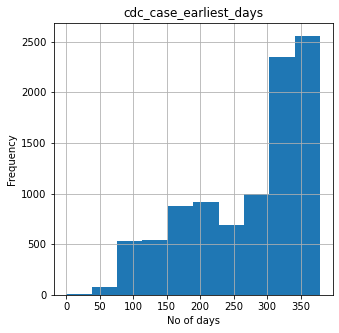

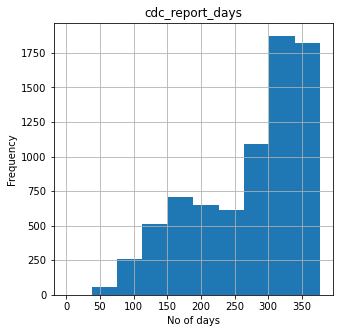

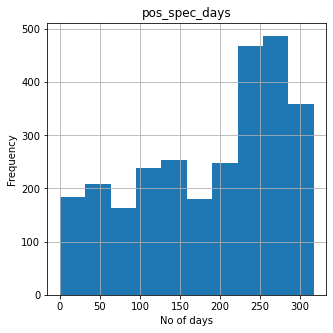

In [55]:
# plot histogram for all continous features
# plt.figure()
# df[numeric_columns].hist(figsize=(20, 20), xrot = 45, range=[0, 400])

for col in numeric_columns:
        f = df[col].plot(kind='hist', figsize=(5,5))
        plt.title(col)
        plt.ylabel('Frequency')
        plt.xlabel('No of days')
        plt.grid()
        plt.show()

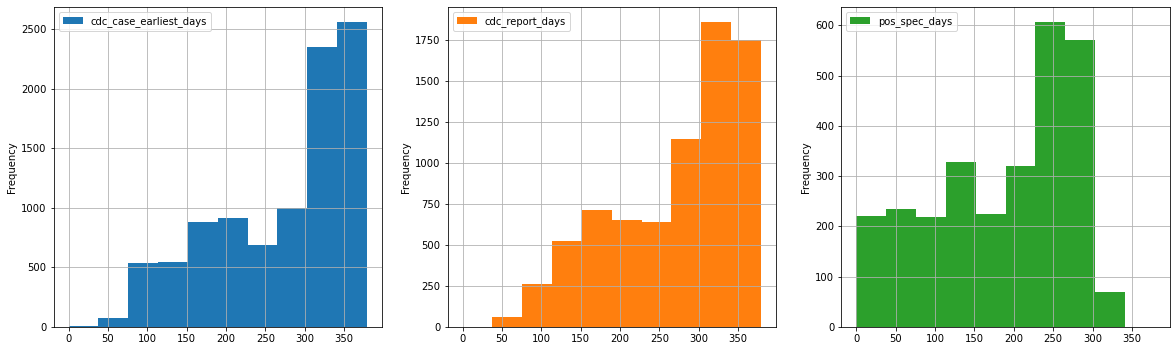

In [56]:
# Plot a histogram summary sheet of all the continuous features and save in a png file
df[numeric_columns].plot(kind='hist', subplots=True, figsize=(20,20), layout=(3,3), sharex=False, sharey=False, grid=True)
plt.savefig('Continuous_histograms.pdf')

### - Plot box plots summary sheet for all the continuous features.

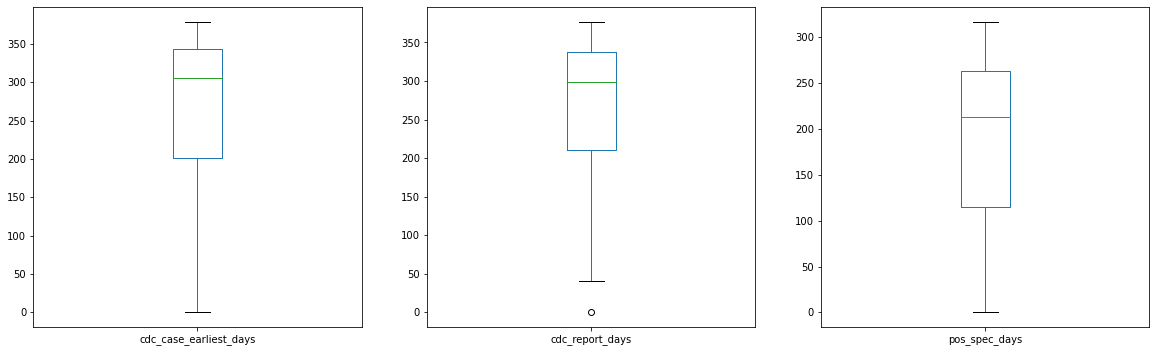

In [57]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(20,20), layout=(3,3), sharex=False, sharey=False)
plt.savefig('Continous_boxplots.pdf')

(array([1, 2, 3]), <a list of 3 Text major ticklabel objects>)

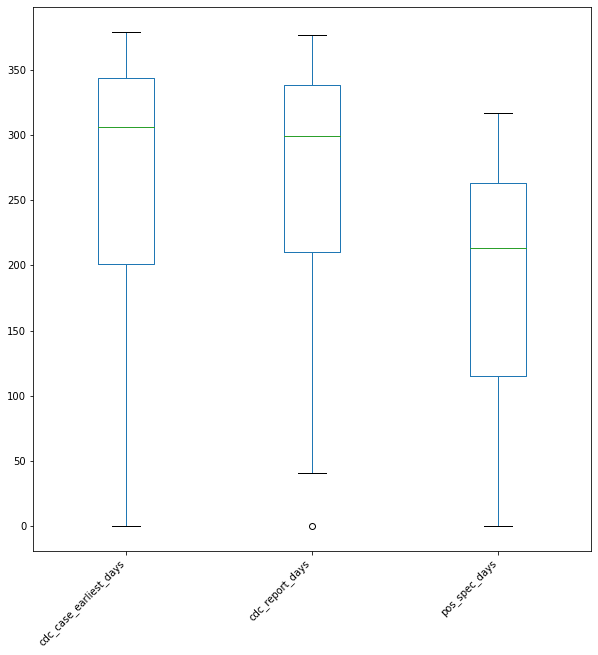

In [58]:
# the combined barplot for all continous features
df[numeric_columns].plot(kind='box',figsize=(10,10))
plt.xticks(rotation=45, ha='right')

### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

 - Test 1 Check if any entries have number of cdc_report_dt greater than cdc_case_earliest_dt (impossible)

In [59]:
test_1 = df_test[['cdc_report_dt','cdc_case_earliest_dt']][df_test['cdc_report_dt']>df_test['cdc_case_earliest_dt']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  4721


,cdc_report_dt,cdc_case_earliest_dt
0,2020-11-05,2020-11-02
3,2020-05-13,2020-04-30
4,2020-04-26,2020-04-16
8,2020-11-19,2020-11-13
9,2020-11-12,2020-11-03


- Test 2 Check if year other than 2020 and 2021 are present in the column (impossible)

In [60]:
# Should'n be more than two year's values present that is 2020 and 2021.
test_2 = print("Number of unique year values: ", df_test['cdc_case_earliest_dt'].dt.year.unique())

Number of unique year values:  [2020 2021]


- Test 3 Check if Non-Hospitalized person is recorded in ICU ward (impossible)

In [61]:
test_3 = df_test[['hosp_yn','icu_yn']][df_test['hosp_yn']=='No'][df_test['icu_yn']=='Yes']
print("Number of rows failing the test: ", test_3.shape[0])
test_3.head(5)

Number of rows failing the test:  2


,hosp_yn,icu_yn
866,No,Yes
7776,No,Yes


- Test 4 Check if person not in ICU has result as death (impossible)

In [62]:
test_4 = df_test[['death_yn','icu_yn']][df_test['death_yn']=='Yes'][df_test['icu_yn']=='No']
print("Number of rows failing the test: ", test_4.shape[0])
test_4.head(5)

Number of rows failing the test:  24


,death_yn,icu_yn
132,Yes,No
361,Yes,No
365,Yes,No
580,Yes,No
898,Yes,No


### - Prepare a table with descriptive statistics for all the categorical features.

In [63]:
# Print table with descriptive statistics for all the categorical features

categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
current_status,9545,2,Laboratory-confirmed case,8912
sex,9545,5,Female,4974
age_group,9545,10,20 - 29 Years,1762
race_ethnicity_combined,9545,9,Unknown,3604
hosp_yn,9545,5,No,5133
icu_yn,9545,4,Missing,7194
death_yn,9545,2,No,9211
medcond_yn,9545,4,Missing,7015


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [64]:
categoricalFeatueDesc = df[categorical_columns].describe().T
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

### - Plot bar plots individual sheet for all the categorical features.



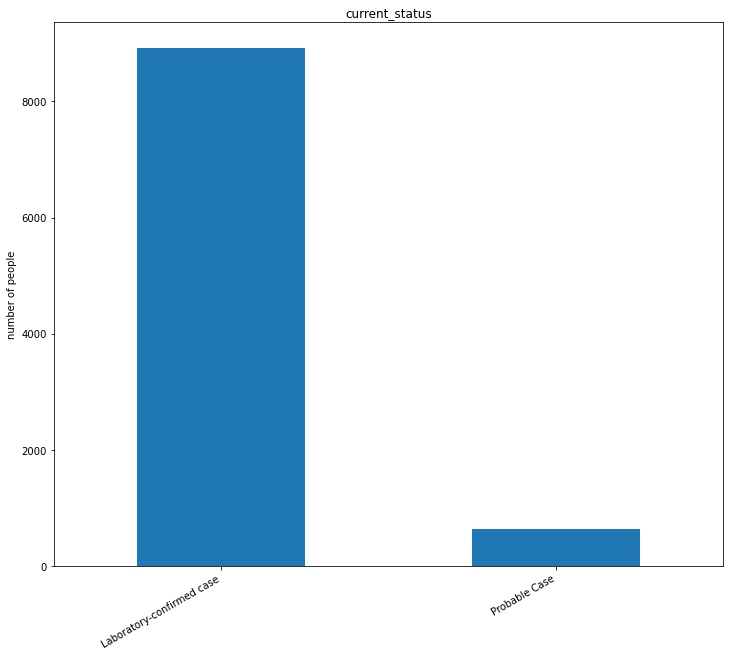

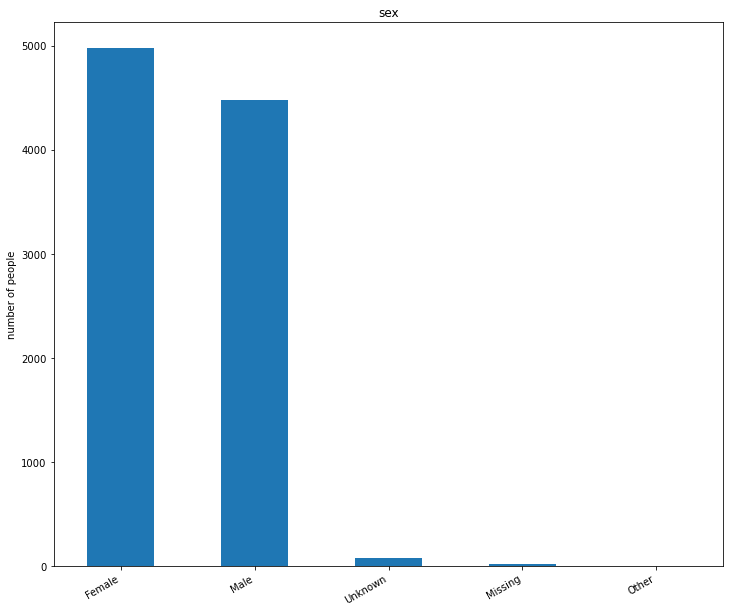

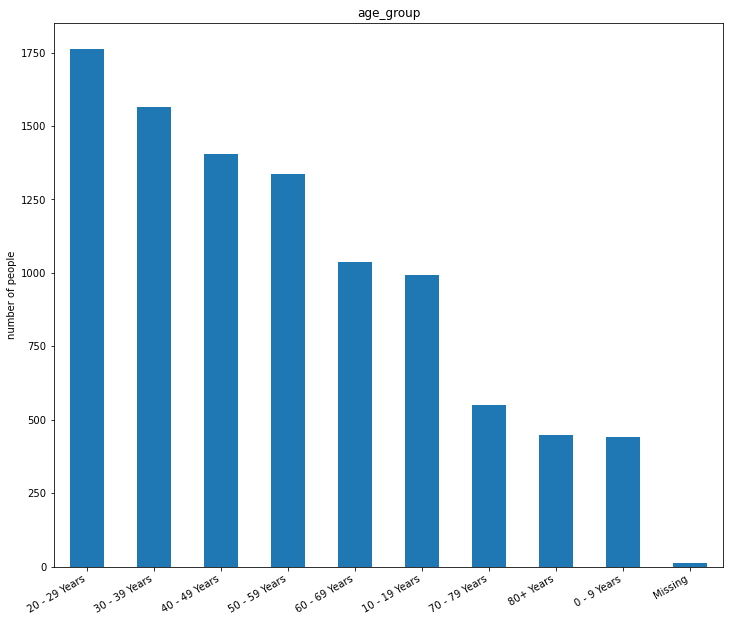

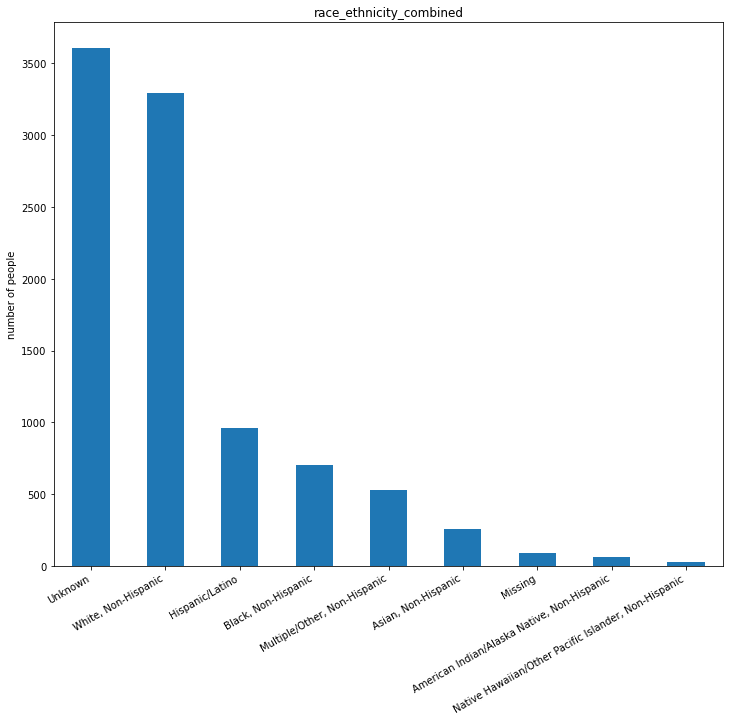

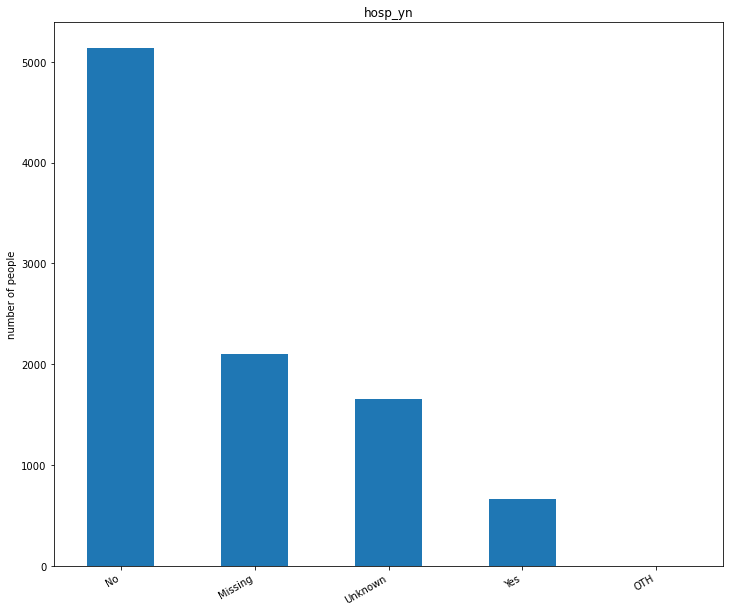

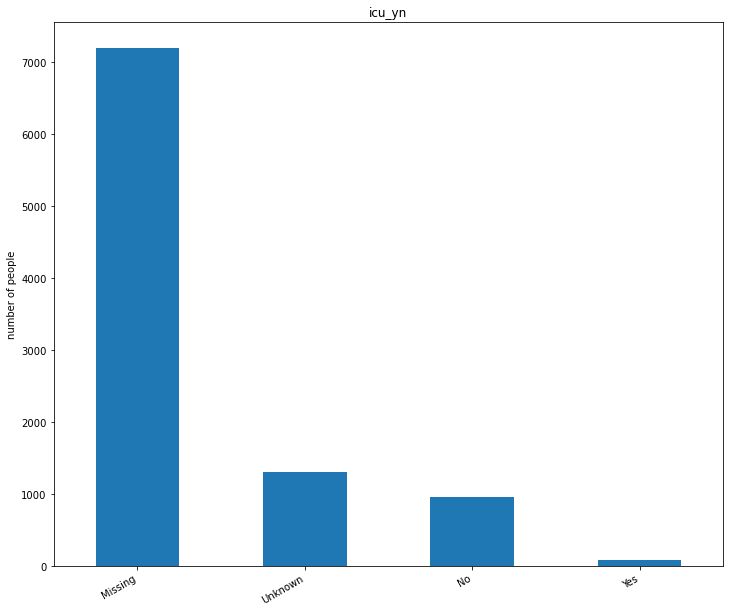

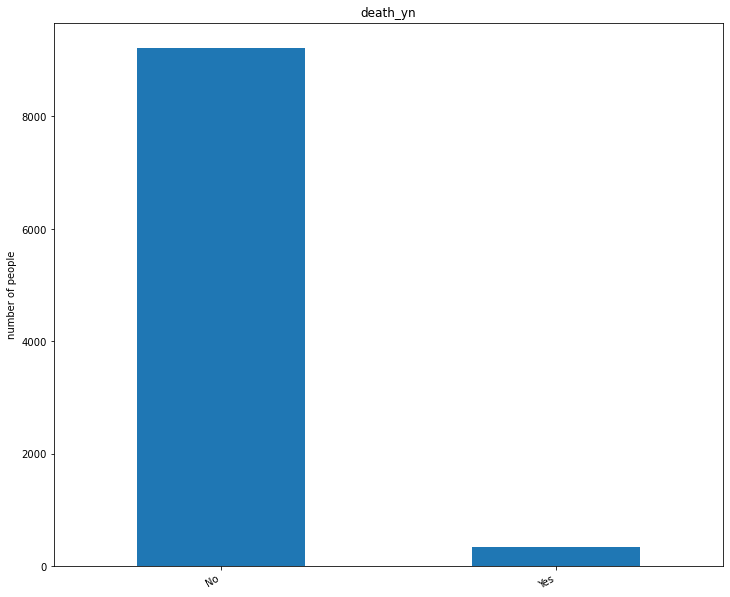

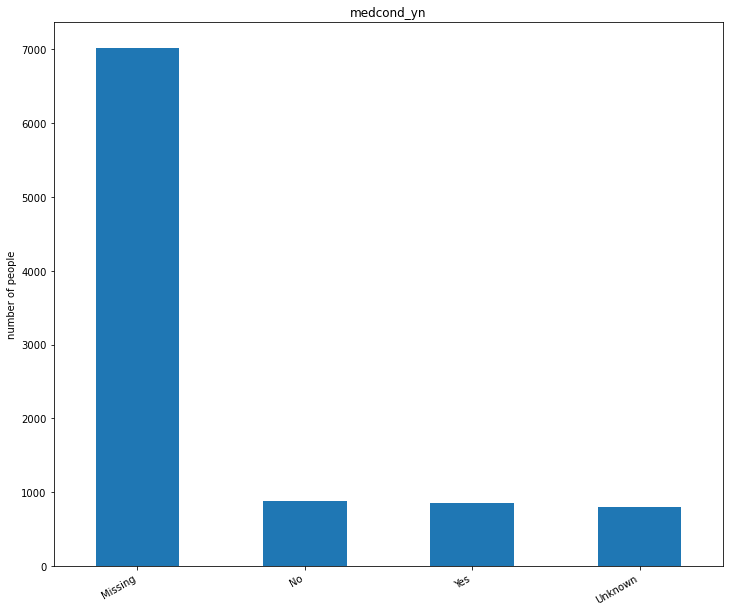

In [65]:
# Plot bar plots for all the catagorical features and saved in a PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for col in categorical_columns:
        img = df[col].value_counts().plot(kind='bar', figsize=(12,10))
        plt.title(col)
        plt.xticks(rotation=30, ha='right')
        plt.ylabel('number of people')
        pp.savefig(img.get_figure())
        plt.show()

# Initial Findings

### Initial findings and detailed discussion for each feature can be found in the accompanying *Data_Quality_Report_Initial_Findings.pdf* file

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **Data_Quality_Report.pdf**:

- For condition where patient is isn't in ICU but reported dead is an issue identified in the data set. Total 24 such entries are found. 
- Few records were fouond where patients status is not hospitalized but they are reported as member in ICU. There are 2 such findings.
- datetime columns such as cdc_report_dt,pos_spec_dt,onset_dt had redundant information which was no use for calculation purpose.Hence dropped  

### - Propose solutions to deal with the problems identified. 

**Depreciated Column** 
- According to the description provided in the data publishing site cdc_report_dt is a depreciated column hence data might be inconsistent for report analysis. Hence dropping the column is possible.

**Missing Values**
- There are large amount (approx 75%) of missing values present in multiple columns which do not help in providing much insights towards data analysis. Hence, those missing values are considered as features instead of dropping them.

**Hospital status**
- Improper mapping of hospitalization is identified against ICU admission status.Imputation will be performed where possible. Otherwise values will be changed to "null".

### - Solutions where the identified data quality issues were addressed. 

**Missing Values**
- There are total 10,000 entries in this data set where columns such as medical condition and ICU has majority (approx 75%) hardcoded missing values. Thus keeping these entries as features for calculation as we dont have much data available for analysis.

In [66]:
print("Missing values \t\t count")
print("medcond_yn \t\t", df[df['medcond_yn']== 'Missing'].shape[0])
print("icu_yn \t\t\t", df[df['icu_yn']== 'Missing'].shape[0])
print()

Missing values 		 count
medcond_yn 		 7015
icu_yn 			 7194



### Summary of data quality plan:

| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| cdc_case_earliest_dt               | Calculated Column             | Do Nothing                     |
| cdc_report_dt                      | Depriciated dates             | Drop the column                |
| pos_spec_dt                        | NULL present (6431) values    | Drop the column                |
| onset_dt                           | Redundancy in dates           | Drop the column                |
| current_status                     | Appropriate Data              | Do Nothing                     |
| sex                                | Missing & Unknown values      | Consider as feature            |
| age_group                          | Unknown values                | Do Nothing                     |
| race_ethnicity_combined            | Missing & Unknown values      | Do Nothing                     |
| hosp_yn                            | Incorrect mapping             | Might impute later             |
| icu_yn                             | Missing (7637) values         | Consider as features           |
| death_yn                           | Appropriate Data              | Do Nothing                     |
| medcond_yn                         | Missing (7549) values         | Consider as features           |


In [67]:
# Print table with categorical statistics after treating the data set as per initial findings.
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9545,2,Laboratory-confirmed case,8912
sex,9545,5,Female,4974
age_group,9545,10,20 - 29 Years,1762
race_ethnicity_combined,9545,9,Unknown,3604
hosp_yn,9545,5,No,5133
icu_yn,9545,4,Missing,7194
death_yn,9545,2,No,9211
medcond_yn,9545,4,Missing,7015


In [68]:
# check the mean of the continous features to replace the value
df_numeric_data_quality_report

,count,mean,std,min,25%,50%,75%,max,card
cdc_case_earliest_days,9545.0,273.306862,86.215245,0.0,201.00,306.0,344.0,379.0,322
cdc_report_days,7591.0,272.670399,81.096151,0.0,210.00,299.0,338.0,377.0,323
pos_spec_days,2790.0,186.730466,89.296143,0.0,115.25,213.0,263.0,317.0,313


In [69]:
# check how many rows are there with min days 
df[df['cdc_report_days'] == 0]

,cdc_case_earliest_days,cdc_report_days,pos_spec_days,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt
9539,15,0.0,59.0,Laboratory-confirmed case,Female,30 - 39 Years,"Black, Non-Hispanic",No,Unknown,No,Yes,2020-01-18,2020-01-18,2020-05-12,2020-01-18


In [70]:
# replace the value with mean as most of the values in the feature are in that range. Hence by replacing this new value does not effect much to the data set
df['cdc_report_days'] = df['cdc_report_days'].replace(0,285)

- Check the missing values and fill them with mean value

In [71]:
df['cdc_report_days'].isnull().sum()

1954

In [72]:
# fill all the missing values with mean value of that feature
df.cdc_report_days = df.cdc_report_days.fillna(int(round(df['cdc_report_days'].mean()))) #round the mean value to nearest int

In [73]:
# to print the null values after filling the cdc_report_days missing values
df.isnull().sum()

cdc_case_earliest_days        0
cdc_report_days               0
pos_spec_days              6755
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
cdc_case_earliest_dt          0
cdc_report_dt              1954
pos_spec_dt                6755
onset_dt                   4532
dtype: int64

- drop the pos_spec_days feature as it is having missing values >50%

In [74]:
# check the no of missing values in pos_spec_days
df['pos_spec_days'].isnull().sum()

6755

In [75]:
# drop the feature as it consists of more than 50% of missing values
df = df.drop(['pos_spec_days'], axis=1)

In [76]:
df.head(5)

,cdc_case_earliest_days,cdc_report_days,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt
0,304,292.0,Probable Case,Male,Missing,"White, Non-Hispanic",No,Missing,No,Missing,2020-11-02,2020-11-05,NaT,2020-11-02
1,333,273.0,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing,2020-12-01,NaT,NaT,NaT
2,300,285.0,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing,2020-10-29,2020-10-29,NaT,2020-10-29
3,118,116.0,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,No,No,No,Unknown,2020-04-30,2020-05-13,2020-04-30,2020-04-30
4,104,99.0,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Yes,Yes,Yes,2020-04-16,2020-04-26,2020-04-17,2020-04-16


### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

In [77]:
# Print table with continuous statistics
numeric_columns = df.select_dtypes(['int64','float64']).columns
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
cdc_case_earliest_days,9545.0,273.306862,86.215245,0.0,201.0,306.0,344.0,379.0
cdc_report_days,9545.0,272.767732,72.265902,41.0,240.0,273.0,327.0,377.0


In [78]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9545,2,Laboratory-confirmed case,8912
sex,9545,5,Female,4974
age_group,9545,10,20 - 29 Years,1762
race_ethnicity_combined,9545,9,Unknown,3604
hosp_yn,9545,5,No,5133
icu_yn,9545,4,Missing,7194
death_yn,9545,2,No,9211
medcond_yn,9545,4,Missing,7015


In [79]:
# Write the cleaned dataframe to a csv file
df.to_csv('categoricalFeatureDescription_V2.csv', index=False)

# (3). Exploring relationships between feature pairs:


### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

### Continous vs continous features
- there are no continous vs continous feature plots because
 - There are only 2 continous features in the data set which are cdc_case_earliest_days and cdc_report_days
 - Plotting between 2 features does not provide any information as they belong to the dates which are reported to cdc
 - Also cdc_report_days is a depriciated value which is not an accurate information.

In [80]:
# view the correlation table b/w all the features and decide the features for pairwise plots
df[numeric_columns].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,cdc_case_earliest_days,cdc_report_days
cdc_case_earliest_days,1.000000,0.248721
cdc_report_days,0.248721,1.000000


The features that I will look at for pairwise feature interaction are the following categorical features:
- current_status
- sex
- age_group
- race_ethnicity_combined
- hosp_yn
- icu_yn
- death_yn
- medcond_yn

In [81]:
# look for correlation between categorical features
df[category_columns].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
current_status,1.000000,-0.031428,-0.008833,0.037853,0.039854,-0.047988,0.016382,-0.010840
sex,-0.031428,1.000000,-0.020202,-0.013400,-0.002341,-0.005495,-0.041569,-0.014767
age_group,-0.008833,-0.020202,1.000000,-0.020088,-0.022708,0.000781,0.009431,0.007928
race_ethnicity_combined,0.037853,-0.013400,-0.020088,1.000000,-0.030929,-0.013084,0.011439,-0.030921
hosp_yn,0.039854,-0.002341,-0.022708,-0.030929,1.000000,0.041580,0.041914,-0.147364
icu_yn,-0.047988,-0.005495,0.000781,-0.013084,0.041580,1.000000,0.105954,0.439096
death_yn,0.016382,-0.041569,0.009431,0.011439,0.041914,0.105954,1.000000,0.035350
medcond_yn,-0.010840,-0.014767,0.007928,-0.030921,-0.147364,0.439096,0.035350,1.000000


In [82]:
# df.plot(kind='scatter', x='cdc_case_earliest_days', y='cdc_report_days')
df[numeric_columns].columns

Index(['cdc_case_earliest_days', 'cdc_report_days'], dtype='object')

In [83]:
df[numeric_columns].head(1)

,cdc_case_earliest_days,cdc_report_days
0,304,292.0


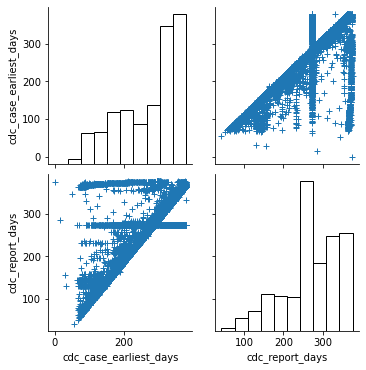

In [84]:
sns.pairplot(df[numeric_columns],
    x_vars=["cdc_case_earliest_days", "cdc_report_days"],
    y_vars=["cdc_case_earliest_days", "cdc_report_days"],
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

### Categorical vs Categorical feature plots

current_status
Index 	 Count
Probable Case 	 633
Laboratory-confirmed case 	 8912


(0.0, 100.0)

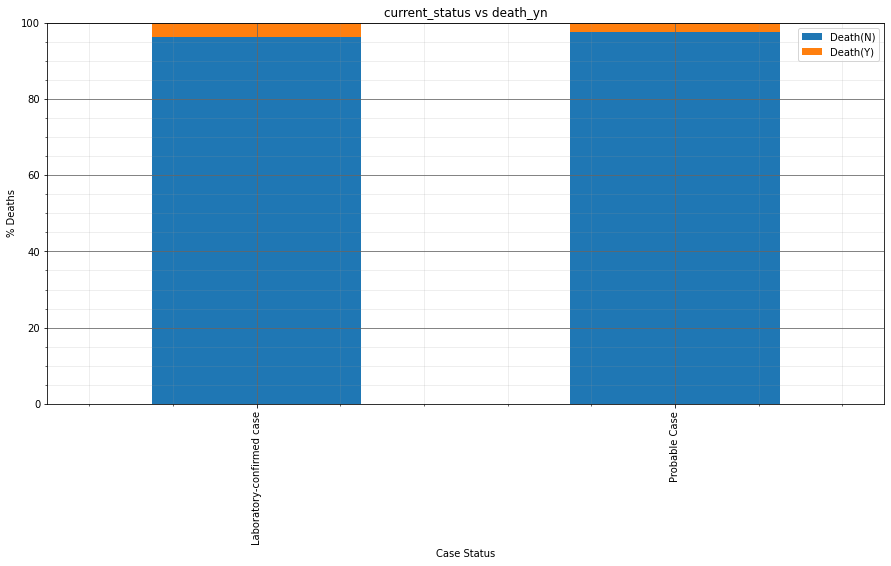

In [85]:
#Finding unique values from the column and arrange in 1D array
current_status = pd.unique(df["current_status"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("current_status")
print("Index \t Count")

# for each current status category
for i in current_status:
    
    count = df[df["current_status"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['current_status'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','death_yn','current_status']].groupby(['current_status','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="current_status vs death_yn", figsize=(15,7), grid=True)

# add legend

my_plot.legend(["Death(N)", "Death(Y)"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Case Status")
my_plot.set_ylabel("% Deaths")
my_plot.set_ylim([0,100])

sex
Index 	 Count
Male 	 4477
Female 	 4974
Unknown 	 74
Missing 	 19
Other 	 1


(0.0, 100.0)

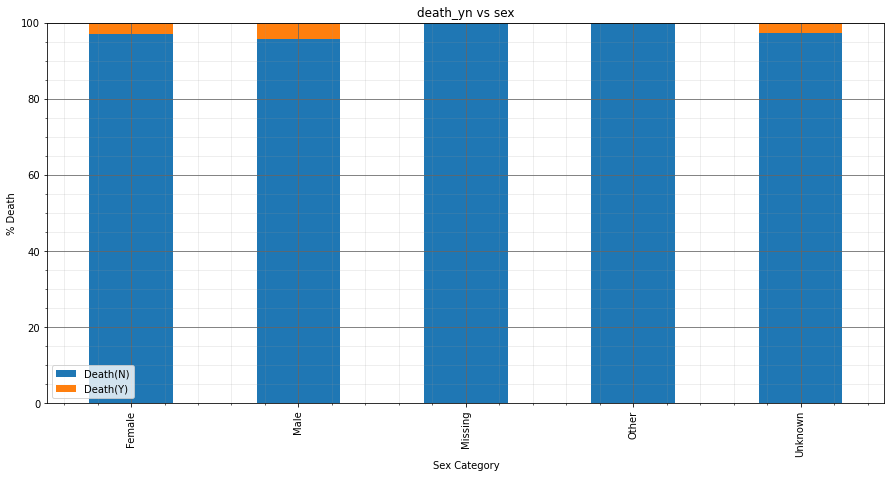

In [86]:
#Finding unique values from the column and arrange in 1D array
sex = pd.unique(df["sex"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("sex")
print("Index \t Count")

# for each sex category
for i in sex:
    
    count = df[df["sex"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['sex'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','sex','death_yn']].groupby(['sex','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs sex", figsize=(15,7), grid=True)

# add legend

my_plot.legend(["Death(N)", "Death(Y)"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Sex Category")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])

age_group
Index 	 Count
Missing 	 12
20 - 29 Years 	 1762
40 - 49 Years 	 1404
70 - 79 Years 	 549
80+ Years 	 448
30 - 39 Years 	 1564
50 - 59 Years 	 1336
10 - 19 Years 	 994
60 - 69 Years 	 1036
0 - 9 Years 	 440


(0.0, 100.0)

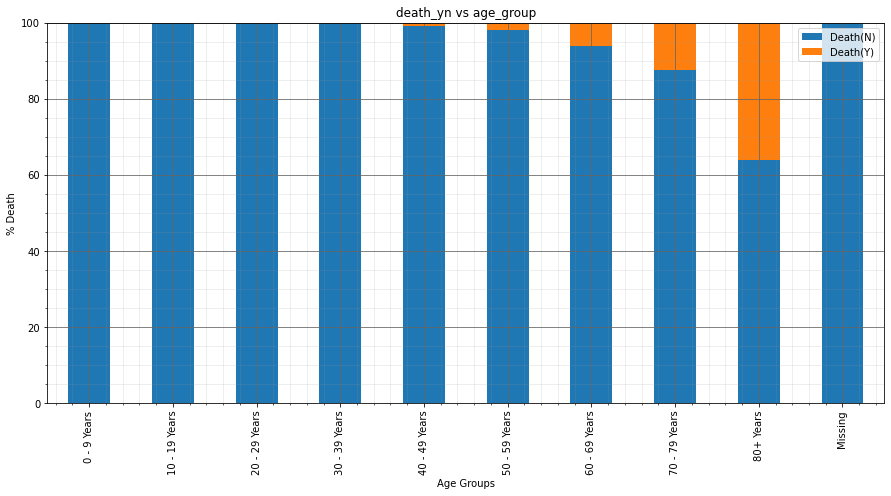

In [87]:
#Finding unique values from the column and arrange in 1D array
age_group = pd.unique(df["age_group"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("age_group")
print("Index \t Count")

# for each age group category
for i in age_group:
    
    count = df[df["age_group"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['age_group'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','age_group','death_yn']].groupby(['age_group','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs age_group", figsize=(15,7), grid=True)

# add legend

my_plot.legend(["Death(N)", "Death(Y)"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age Groups")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])

race_ethnicity_combined
Index 	 Count
White, Non-Hispanic 	 3296
Unknown 	 3604
American Indian/Alaska Native, Non-Hispanic 	 66
Hispanic/Latino 	 964
Black, Non-Hispanic 	 707
Multiple/Other, Non-Hispanic 	 532
Asian, Non-Hispanic 	 255
Missing 	 94
Native Hawaiian/Other Pacific Islander, Non-Hispanic 	 27


(0.0, 100.0)

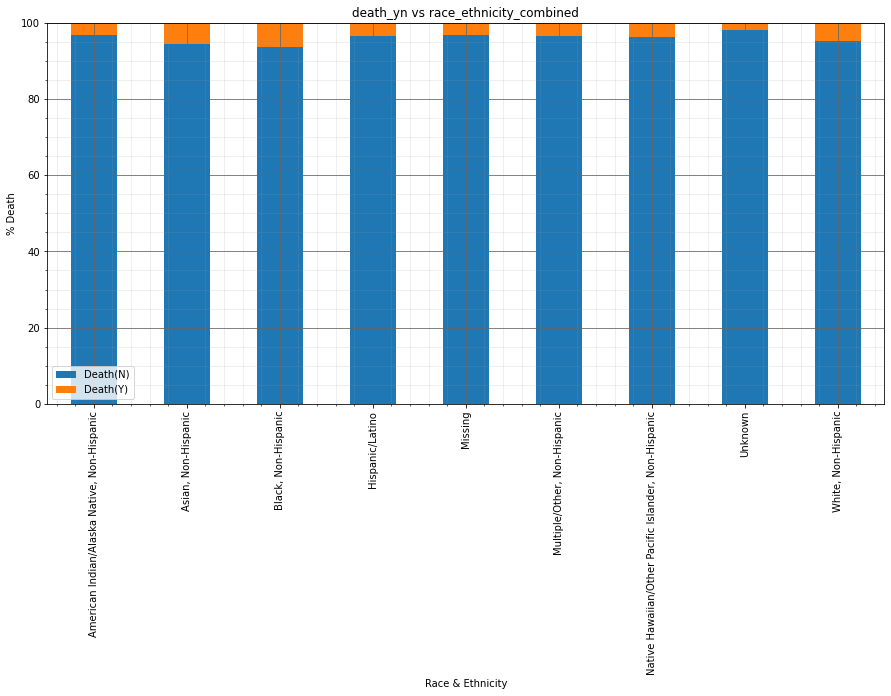

In [88]:
#Finding unique values from the column and arrange in 1D array
race_ethnicity_combined = pd.unique(df["race_ethnicity_combined"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("race_ethnicity_combined")
print("Index \t Count")

# for each combined race category
for i in race_ethnicity_combined:
    
    count = df[df["race_ethnicity_combined"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['race_ethnicity_combined'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','race_ethnicity_combined','death_yn']].groupby(['race_ethnicity_combined','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs race_ethnicity_combined", figsize=(15,7), grid=True)

# add legend

my_plot.legend(["Death(N)", "Death(Y)"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Race & Ethnicity")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])

hosp_yn
Index 	 Count
No 	 5133
Yes 	 661
Missing 	 2099
Unknown 	 1651
OTH 	 1


(0.0, 100.0)

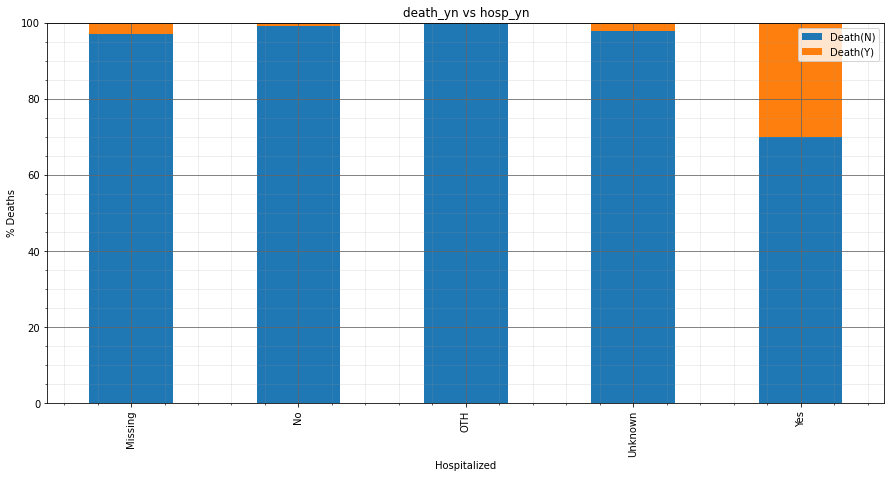

In [89]:
#Finding unique values from the column and arrange in 1D array
hosp_yn = pd.unique(df["hosp_yn"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("hosp_yn")
print("Index \t Count")

# for each hospitalized category
for i in hosp_yn:
    
    count = df[df["hosp_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['hosp_yn'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','hosp_yn','death_yn']].groupby(['hosp_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs hosp_yn", figsize=(15,7), grid=True)

# add legend

my_plot.legend(["Death(N)", "Death(Y)"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Hospitalized")
my_plot.set_ylabel("% Deaths")
my_plot.set_ylim([0,100])

icu_yn
Index 	 Count
Missing 	 7194
No 	 965
Yes 	 83
Unknown 	 1303


(0.0, 100.0)

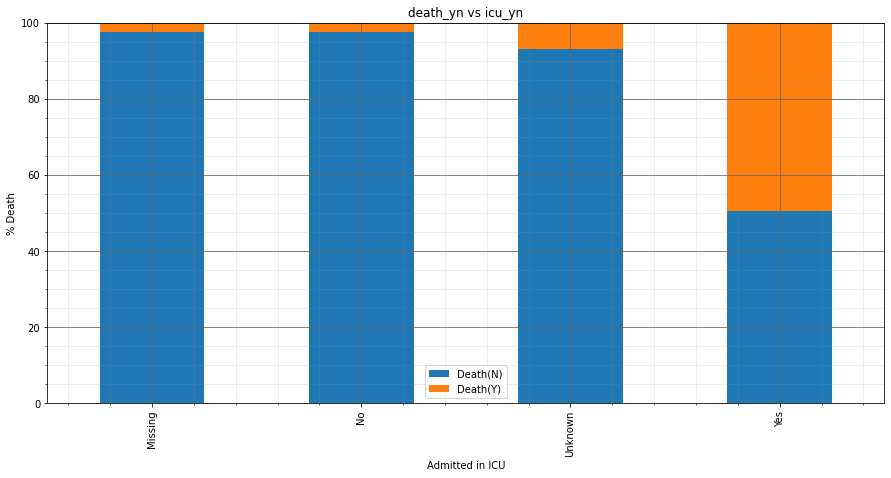

In [90]:
#Finding unique values from the column and arrange in 1D array
icu_yn = pd.unique(df["icu_yn"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("icu_yn")
print("Index \t Count")

# for each ICU category
for i in icu_yn:
    
    count = df[df["icu_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['icu_yn'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','icu_yn','death_yn']].groupby(['icu_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs icu_yn", figsize=(15,7), grid=True)

# add legend

my_plot.legend(["Death(N)", "Death(Y)"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Admitted in ICU")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])

medcond_yn
Index 	 Count
Missing 	 7015
Unknown 	 801
Yes 	 853
No 	 876


(0.0, 100.0)

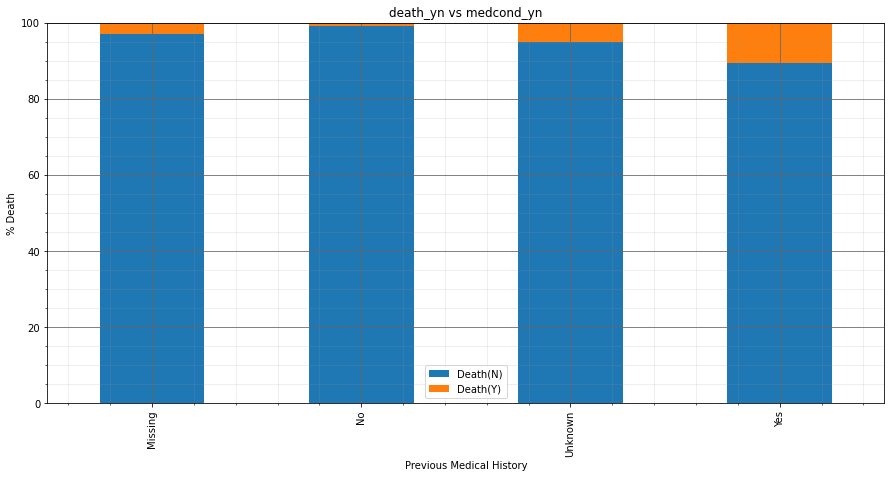

In [91]:
#Finding unique values from the column and arrange in 1D array
medcond_yn = pd.unique(df["medcond_yn"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("medcond_yn")
print("Index \t Count")

# for each medical condition category
for i in medcond_yn:
    
    count = df[df["medcond_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['medcond_yn'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','medcond_yn','death_yn']].groupby(['medcond_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs medcond_yn", figsize=(15,7), grid=True)

# add legend

my_plot.legend(["Death(N)", "Death(Y)"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Previous Medical History")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])

In [92]:
# confirmation of analysis provided in the graph

print("The number of deaths(Yes) for the age group 80+ years")
print(df[(df["age_group"] == "80+ Years") & (df["death_yn"] == "Yes")].shape)
no_of_yes = df[(df["age_group"] == "80+ Years") & (df["death_yn"] == "Yes")].shape[0]

print("\nThe number of deaths(No) for the age group 80+ years")
print(df[(df["age_group"] == "80+ Years") & (df["death_yn"] == "No")].shape)
no_of_NO = df[(df["age_group"] == "80+ Years") & (df["death_yn"] == "No")].shape[0]
# df[df["age_group"] == "80+ Years"].count()['death_yn']

print("\nThe total number of values in age group '80+ years' with respect to deaths : ")
print(no_of_yes+no_of_NO) #which is expected according to the graph

print("\n% of people not dead :")
print((no_of_NO*100)/(no_of_yes+no_of_NO))

The number of deaths(Yes) for the age group 80+ years
(162, 15)

The number of deaths(No) for the age group 80+ years
(286, 15)

The total number of values in age group '80+ years' with respect to deaths : 
448

% of people not dead :
63.839285714285715


### Continuous-categorical feature plots

<Figure size 432x288 with 0 Axes>

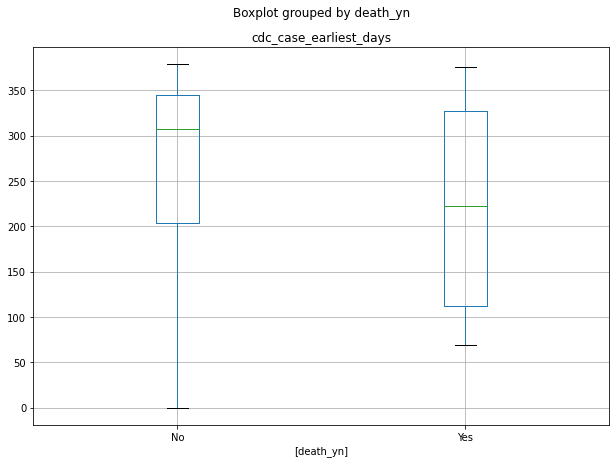

In [93]:
# boxplot b/w cdc_case_earliest_days and death_yn
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
df.boxplot(column=['cdc_case_earliest_days'], by=['death_yn'], flierprops=flierprops, figsize=(10,7))

Mean
224.37125748502993


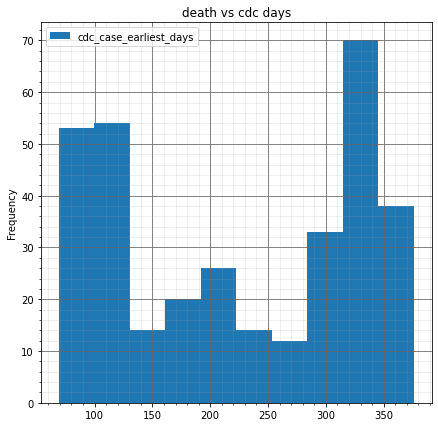

In [94]:
df[df['death_yn'] == "Yes"][['cdc_case_earliest_days']].plot(kind='hist',figsize=(7,7), bins=10, title="death vs cdc days")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# to compare the mean value with the plotted box-graph above
print('\033[1m' +'Mean'+ '\033[0m')
print(df[df['death_yn'] == "Yes"]['cdc_case_earliest_days'].mean())

Mean
275.08131581804366


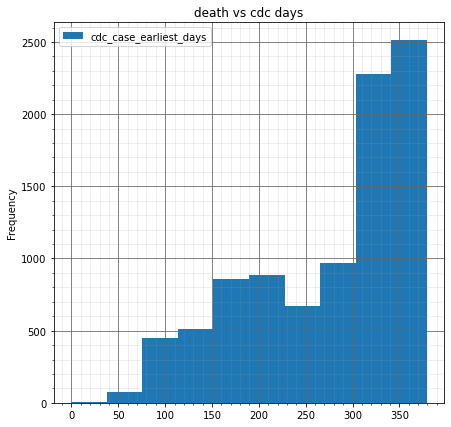

In [95]:
df[df['death_yn'] == "No"][['cdc_case_earliest_days']].plot(kind='hist',figsize=(7,7), bins=10, title="death vs cdc days")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# to compare the mean value with the plotted box-graph above
print('\033[1m'+'Mean'+ '\033[0m')
print(df[df['death_yn'] == "No"]['cdc_case_earliest_days'].mean())

2. Plot cdc report days vs deaths

<Figure size 432x288 with 0 Axes>

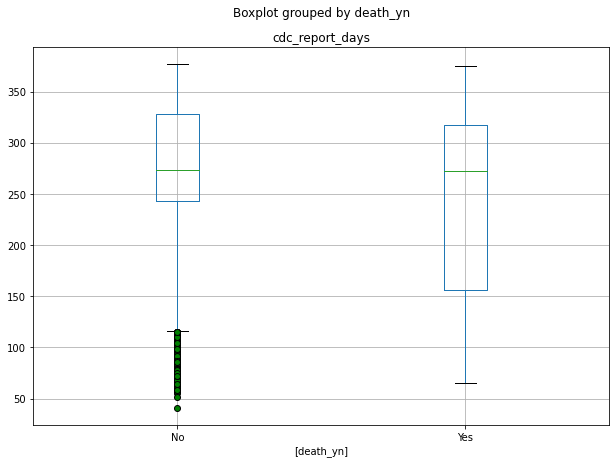

In [96]:
# boxplot b/w cdc_report_days and death_yn
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
df.boxplot(column=['cdc_report_days'], by=['death_yn'], flierprops=flierprops, figsize=(10,7))

Mean
236.811377245509


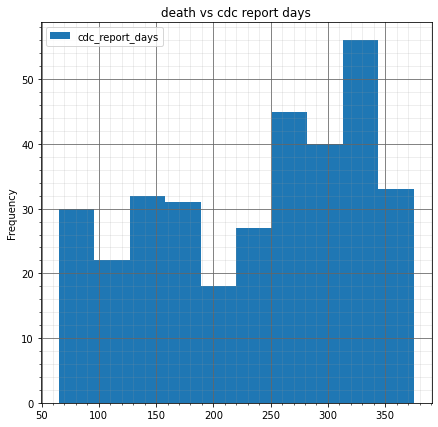

In [97]:
df[df['death_yn'] == "Yes"][['cdc_report_days']].plot(kind='hist',figsize=(7,7), bins=10, title="death vs cdc report days")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# to compare the mean value with the plotted box-graph above
print('\033[1m'+'Mean'+ '\033[0m')
print(df[df['death_yn'] == "Yes"]['cdc_report_days'].mean())

Mean
274.071544891977


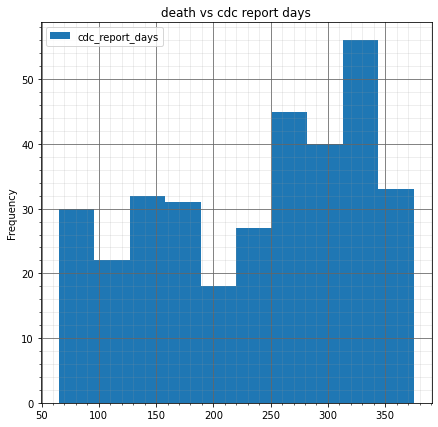

In [98]:
df[df['death_yn'] == "Yes"][['cdc_report_days']].plot(kind='hist',figsize=(7,7), bins=10, title="death vs cdc report days")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# to compare the mean value with the plotted box-graph above
print('\033[1m'+'Mean'+ '\033[0m')
print(df[df['death_yn'] == "No"]['cdc_report_days'].mean())

From above results, the graphs indicate that the no of deaths(Yes, No) are evenly distributed among all the range of dates in the pandemic period. This trend of ouput which is expected as the cdc_report_days is a depriciated value to the cdc_case_earliest_days. Hence the values are distributed among the whole range.
Also, it is the reason that the no of deaths are available in all range of days which is also shown in the boxplot above.


# (4). Transform, extend or combine the existing features to create a few new features


In [99]:
df.head(5)

,cdc_case_earliest_days,cdc_report_days,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,percent
0,304,292.0,Probable Case,Male,Missing,"White, Non-Hispanic",No,Missing,No,Missing,2020-11-02,2020-11-05,NaT,2020-11-02,0.014255
1,333,273.0,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing,2020-12-01,NaT,NaT,NaT,0.014255
2,300,285.0,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing,2020-10-29,2020-10-29,NaT,2020-10-29,0.014255
3,118,116.0,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,No,No,No,Unknown,2020-04-30,2020-05-13,2020-04-30,2020-04-30,0.124844
4,104,99.0,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Yes,Yes,Yes,2020-04-16,2020-04-26,2020-04-17,2020-04-16,0.117233


#### **New feature 1** 
- hosp_miss : quantifies if data is missing or available 
- From data analysis if an entry has been missing, the type of missing is not so important
- Therefore it is makes sense to derive a feature with a binary outcome, Missing or not

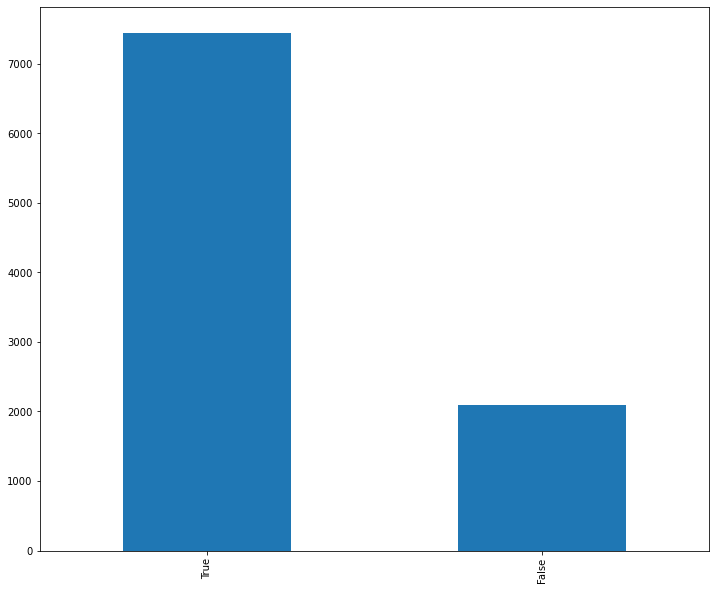

In [100]:
df['hosp_miss'] = df['hosp_yn']!= ('Missing')
df['hosp_miss'] = df['hosp_miss'].astype('category')
df["hosp_miss"].value_counts().plot(kind='bar', figsize=(12,10))

hosp_miss
Index 	 Count
True 	 7446
False 	 2099


(0.0, 100.0)

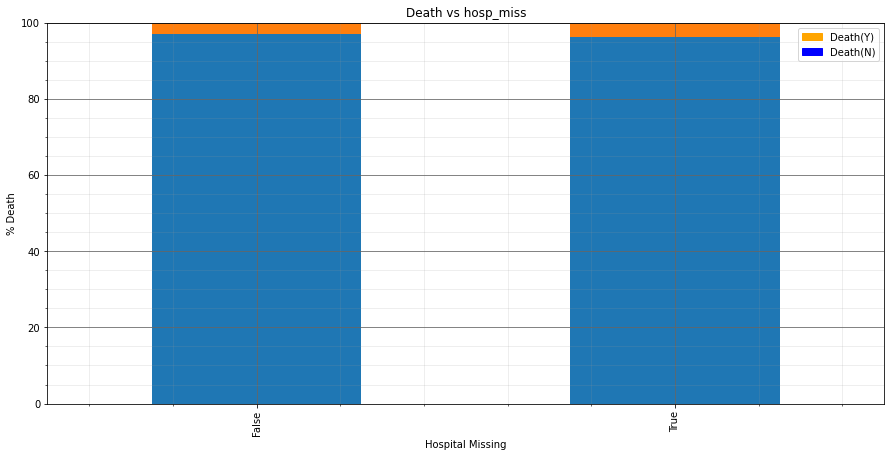

In [101]:
#Using code from the module lab
hosp_yn = pd.unique(df['hosp_miss'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('hosp_miss')
print("Index \t Count")

# for each income level
for i in hosp_yn:
    
    count = df[df['hosp_miss'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['hosp_miss'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','hosp_miss','death_yn']].groupby(['hosp_miss','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Death vs hosp_miss", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Death(Y)')
blue_patch = mpatches.Patch(color='blue', label='Death(N)')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("Hospital Missing")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])

#### **New feature 2** 
- med_miss : quantifies if data is missing or available 
- From analysis of the data if an entry has been missing, the type of missing is not so important
- Therefore it is makes sense to derive a feature with a binary outcome, Missing or not

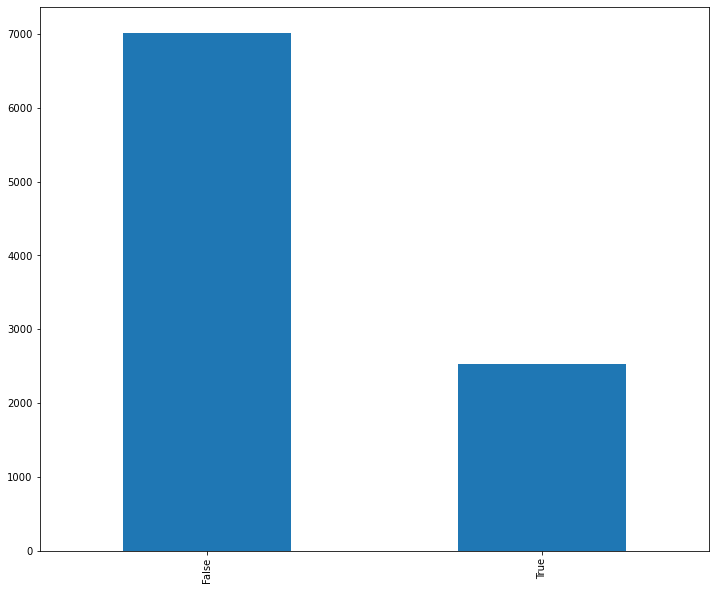

In [102]:
df['med_miss'] = df['medcond_yn']!= ('Missing')
df['med_miss'] = df['med_miss'].astype('category')
df["med_miss"].value_counts().plot(kind='bar', figsize=(12,10))

med_miss
Index 	 Count
False 	 7015
True 	 2530


(0.0, 100.0)

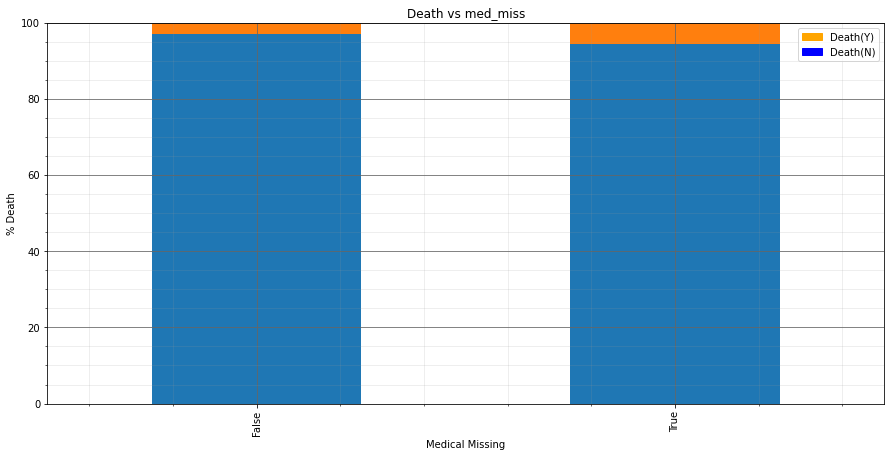

In [103]:
#Using code from the module lab
hosp_yn = pd.unique(df['med_miss'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('med_miss')
print("Index \t Count")

# for each income level
for i in hosp_yn:
    
    count = df[df['med_miss'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['med_miss'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','med_miss','death_yn']].groupby(['med_miss','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Death vs med_miss", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Death(Y)')
blue_patch = mpatches.Patch(color='blue', label='Death(N)')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("Medical Missing")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])

#### **New feature 3** 
- icu_yn_miss : quantifies if data is missing or available 
- From analysis of the data if an entry has been missing, the type of missing is not so important
- Therefore it is makes sense to derive a feature with a binary outcome, Missing or not

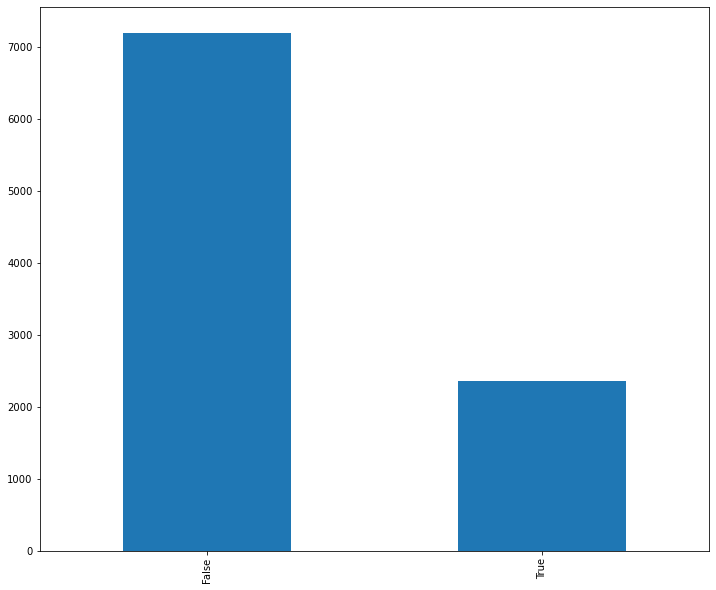

In [104]:
df['icu_yn_miss'] = df['icu_yn']!= ('Missing')
df['icu_yn_miss'] = df['icu_yn_miss'].astype('category')
df["icu_yn_miss"].value_counts().plot(kind='bar', figsize=(12,10))

icu_yn_miss
Index 	 Count
False 	 7194
True 	 2351


(0.0, 100.0)

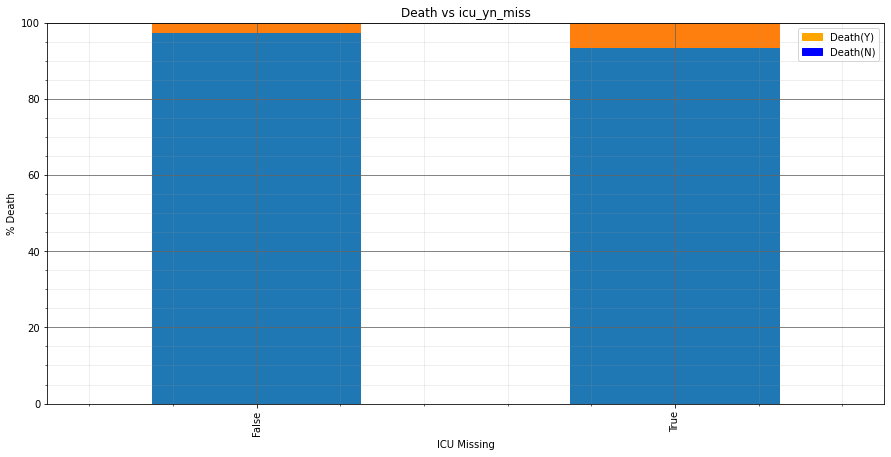

In [105]:
#Using code from the module lab
icu_yn = pd.unique(df['icu_yn_miss'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('icu_yn_miss')
print("Index \t Count")

# for each income level
for i in icu_yn:
    
    count = df[df['icu_yn_miss'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['icu_yn_miss'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','icu_yn_miss','death_yn']].groupby(['icu_yn_miss','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Death vs icu_yn_miss", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Death(Y)')
blue_patch = mpatches.Patch(color='blue', label='Death(N)')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("ICU Missing")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])

In [106]:
df.age_group.value_counts()

20 - 29 Years    1762
30 - 39 Years    1564
40 - 49 Years    1404
50 - 59 Years    1336
60 - 69 Years    1036
10 - 19 Years     994
70 - 79 Years     549
80+ Years         448
0 - 9 Years       440
Missing            12
Name: age_group, dtype: int64


The categories in the age_group feature is combined and created a new feature called life_stages is created.
Here different age groups are clubbed as life stage (i.e. 0-9 years is called a child). Simillarly all other age ranges are converted as child, young, adult, old.
Hence using this feature we can obtain the no of deaths for a category(eg: young). This helps the model to obtain better results

In [107]:
# replace the data with the life stages in the age_group feature
df['age_category'] = df['age_group'].replace({'0 - 9 Years':'Child', '10 - 19 Years':'Young', '20 - 29 Years':'Young', '30 - 39 Years':'Adult', '40 - 49 Years':'Adult', '50 - 59 Years':'Adult', '60 - 69 Years':'Old', '70 - 79 Years':'Old', '80+ Years':'Old', 'Missing':'Missing'})
df['age_category'] = df['age_category'].astype('category')

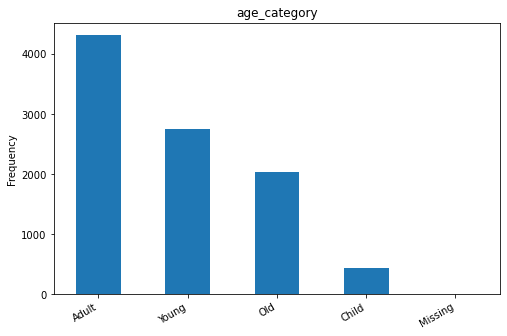

In [108]:
df['age_category'].value_counts(dropna=False).plot(kind='bar', title='age_category', figsize=(8,5))
plt.xticks(rotation=30, ha='right')
plt.ylabel('Frequency')
plt.show()


In [109]:
df['death_monthly']=df['cdc_case_earliest_days']
for i in range(0, 331, 30):

    no_of_value_in_range = df[(df.cdc_case_earliest_days >= i) & (df.cdc_case_earliest_days < i+30)].shape[0]
    no_of_deaths_in_range = df[(df.cdc_case_earliest_days >= i) & (df.cdc_case_earliest_days < i+30) & (df.death_yn == 'Yes')].shape[0]
    per_deaths = ((100*no_of_deaths_in_range)/no_of_value_in_range)
    index_values = df['death_monthly'][(df.cdc_case_earliest_days < i+30) & (df.cdc_case_earliest_days >= i)].index.values

    for i in index_values:
        df.loc[i,['death_monthly']]=per_deaths

###  - Print data types, descriptive tables

In [110]:
df.dtypes

cdc_case_earliest_days              int64
cdc_report_days                   float64
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
percent                           float64
hosp_miss                        category
med_miss                         category
icu_yn_miss                      category
age_category                     category
death_monthly                     float64
dtype: object

In [111]:
# Print table with categorical statistics
df_cat = df.select_dtypes(['category']).describe().T
df_cat

,count,unique,top,freq
current_status,9545,2,Laboratory-confirmed case,8912
sex,9545,5,Female,4974
age_group,9545,10,20 - 29 Years,1762
race_ethnicity_combined,9545,9,Unknown,3604
hosp_yn,9545,5,No,5133
icu_yn,9545,4,Missing,7194
death_yn,9545,2,No,9211
medcond_yn,9545,4,Missing,7015
hosp_miss,9545,2,True,7446
med_miss,9545,2,False,7015


In [112]:
# Write the cleaned dataframe to a csv file
df_cat.to_csv('categoricalFeatureDescription_3.csv', index=True)

In [113]:
df.head(5)

,cdc_case_earliest_days,cdc_report_days,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,percent,hosp_miss,med_miss,icu_yn_miss,age_category,death_monthly
0,304,292.0,Probable Case,Male,Missing,"White, Non-Hispanic",No,Missing,No,Missing,2020-11-02,2020-11-05,NaT,2020-11-02,0.013900,True,False,False,Missing,2.931596
1,333,273.0,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing,2020-12-01,NaT,NaT,NaT,0.013900,True,False,False,Young,2.751423
2,300,285.0,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing,2020-10-29,2020-10-29,NaT,2020-10-29,0.013900,True,False,False,Adult,2.931596
3,118,116.0,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,No,No,No,Unknown,2020-04-30,2020-05-13,2020-04-30,2020-04-30,0.042535,True,True,True,Old,16.000000
4,104,99.0,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Yes,Yes,Yes,2020-04-16,2020-04-26,2020-04-17,2020-04-16,0.042535,True,True,True,Old,16.000000


In [114]:
df.to_csv('final_covid19_20201672_cdc.csv', index=True)